In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"F:\Course Resources\Sem 3\DAI - 101 - Data Science\tips (data for regression problem).csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
data.shape

(244, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Exploratory Data Analysis 

<Axes: xlabel='day', ylabel='tip'>

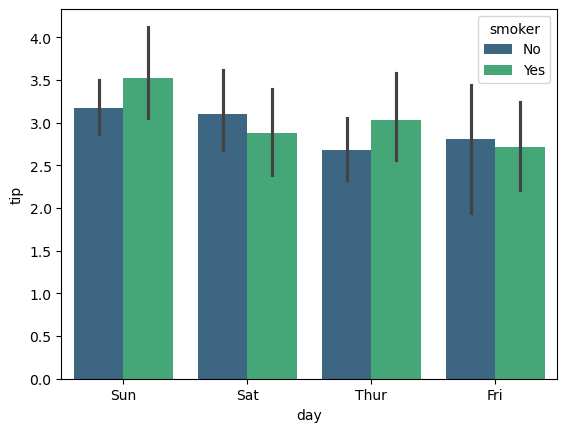

In [14]:
sns.barplot(data=data,x="day",y="tip",palette="viridis",hue="smoker")

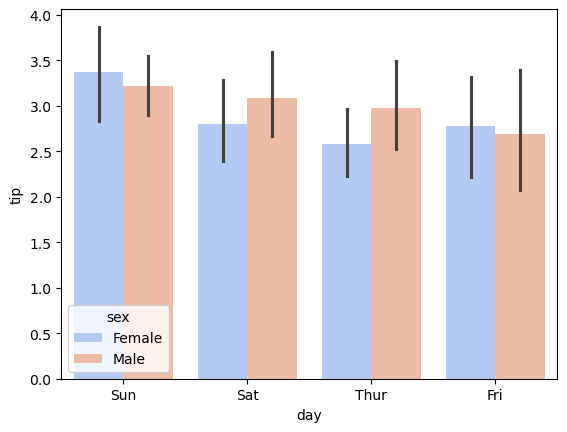

In [16]:
sns.barplot(data=data, x="day", y="tip", palette="coolwarm", hue="sex")
plt.show()

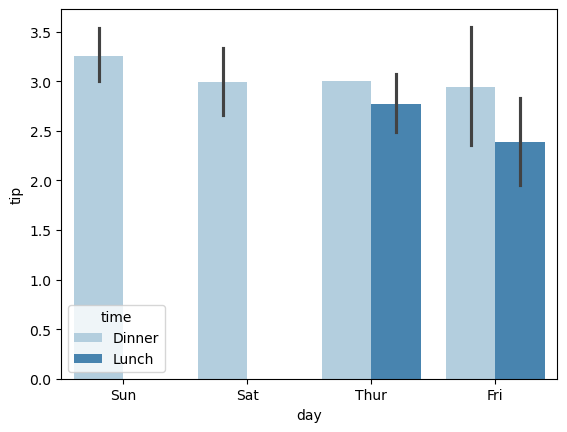

In [18]:
sns.barplot(data=data, x="day", y="tip", palette="Blues", hue="time")
plt.show()

<Axes: xlabel='smoker', ylabel='tip'>

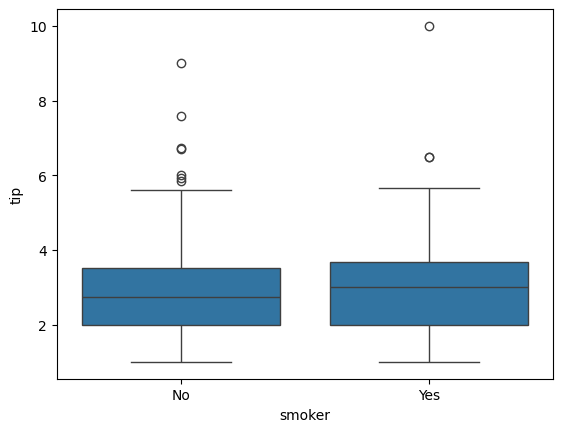

In [20]:
sns.boxplot(data=data,x="smoker",y="tip")

<Axes: xlabel='day', ylabel='tip'>

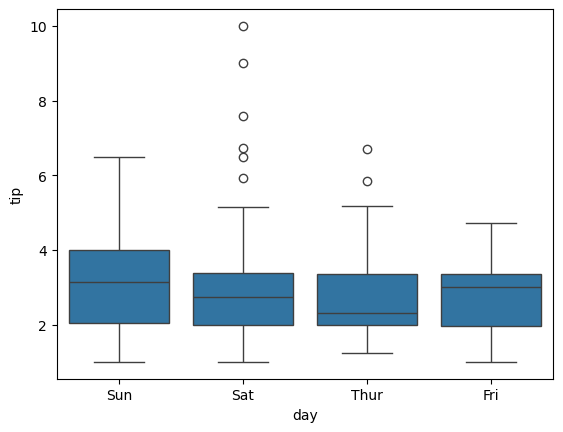

In [22]:
sns.boxplot(data=data,x="day",y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

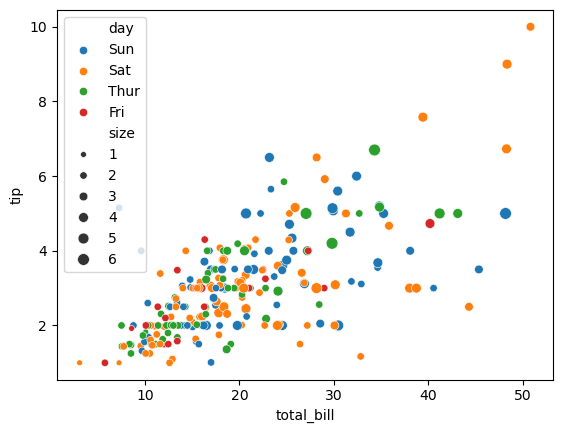

In [24]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="day",size="size")

### Conclusions -  Factors that significantly impact tip amounts
- **What Affects Tips the Most**: Tips are mainly influenced by the total bill and the size of the group.
- **Who Tips Higher**: Male customers tend to leave higher tips.
- **Best Days for Tips**: Tips are generally higher on weekends, especially on Saturdays and Sundays.


In [27]:
x=data.drop(columns=["tip"])
y=data.tip

#Splitting the Dataset
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,train_size=0.8,random_state=7)

In [29]:
x["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
x["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [33]:
x["smoker"].unique()

array(['No', 'Yes'], dtype=object)

### One hot encoding columns 

In [38]:
x_train = pd.get_dummies(x_train, columns=["sex","smoker","time"],drop_first=True)
x_valid = pd.get_dummies(x_valid, columns=["sex","smoker","time"],drop_first=True)

x_train = x_train.astype({col: 'int' for col in x_train.select_dtypes('bool').columns})
x_valid = x_valid.astype({col: 'int' for col in x_valid.select_dtypes('bool').columns})

In [40]:
x.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train["day"] = le.fit_transform(x_train["day"])
x_valid["day"] = le.transform(x_valid["day"])

In [44]:
x_train.head()

,total_bill,day,size,sex_Male,smoker_Yes,time_Lunch
66,16.45,1,2,0,0,0
208,24.27,1,2,1,1,0
193,15.48,3,2,1,1,1
77,27.20,3,4,1,0,1
96,27.28,0,2,1,1,0


### Model Implementation and Evaluation 

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear = LinearRegression()
linear.fit(x_train, y_train)
ypred_linear = linear.predict(x_valid)
mse_linear = mean_squared_error(y_valid, ypred_linear)
r2_linear = r2_score(y_valid, ypred_linear)
print("mse for linear regression = ",mse_linear)
print("r2 for linear regression = ",r2_linear)

mse for linear regression =  0.8877758961150215
r2 for linear regression =  0.48253122496539935


### Ridge Regularizarion

In [51]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_valid)
mse_ridge = mean_squared_error(y_valid, y_pred_ridge)
r2_ridge = r2_score(y_valid, y_pred_ridge)
print("mse for ridge = ",mse_ridge)
print("r2 for ridge = ",r2_ridge)

mse for ridge =  0.887622093649787
r2 for ridge =  0.48262087368601736


### Lasso Regularization

In [54]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_valid)
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)
r2_lasso = r2_score(y_valid, y_pred_lasso)
print("mse for lasso = ",mse_lasso)
print("r2 for lasso = ",r2_lasso)

mse for lasso =  0.8897031007429528
r2 for lasso =  0.4814078916755221


### Decision tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(x_train, y_train)
y_pred_dectree = tree_model.predict(x_valid)
mse_dectree = mean_squared_error(y_valid, y_pred_dectree)
r2_dectree = r2_score(y_valid, y_pred_dectree)
print("mse for decision tree = ",mse_dectree)
print("r2 for decision tree = ",r2_dectree)

mse for decision tree =  0.81484113883199
r2 for decision tree =  0.5250435973713814


### Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_valid)
mse_rf = mean_squared_error(y_valid, y_pred_rf)
r2_rf = r2_score(y_valid, y_pred_rf)
print("mse for random forest = ",mse_rf)
print("r2 for random forest = ",r2_rf)

mse for random forest =  0.678898752364078
r2 for random forest =  0.6042819958328288


### SVM

In [63]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_valid)
mse_svr = mean_squared_error(y_valid, y_pred_svr)
r2_svr = r2_score(y_valid, y_pred_svr)
print("mse for SVM = ",mse_svr)
print("r2 for SVM = ",r2_svr)

mse for SVM =  0.890718194009642
r2 for SVM =  0.48081621187033896


### KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_train)
mse_knn = mean_squared_error(y_train, y_pred_knn)
r2_knn = r2_score(y_train, y_pred_knn)
print("mse for KNN = ",mse_knn)
print("r2 for KNN = ",r2_knn)

mse for KNN =  0.9745640615384616
r2 for KNN =  0.5005348551688764


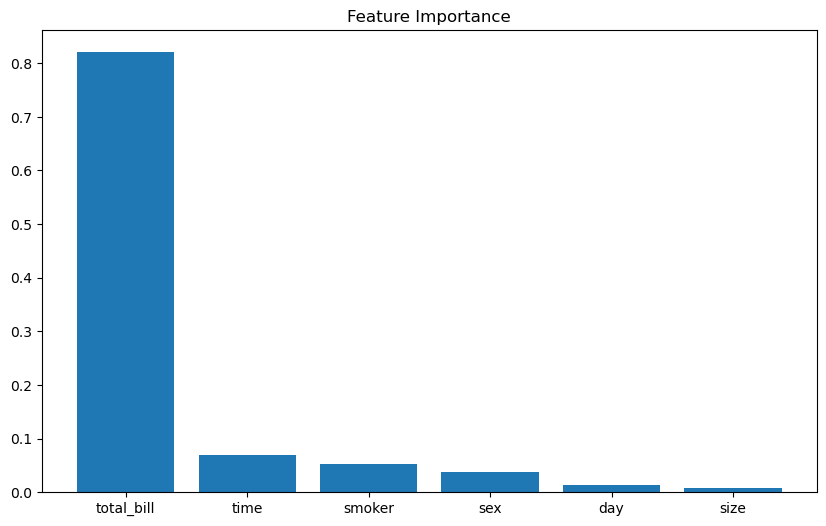

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for the Random Forest model
feature_importances = rf_model.feature_importances_
features = x.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices])
plt.show()

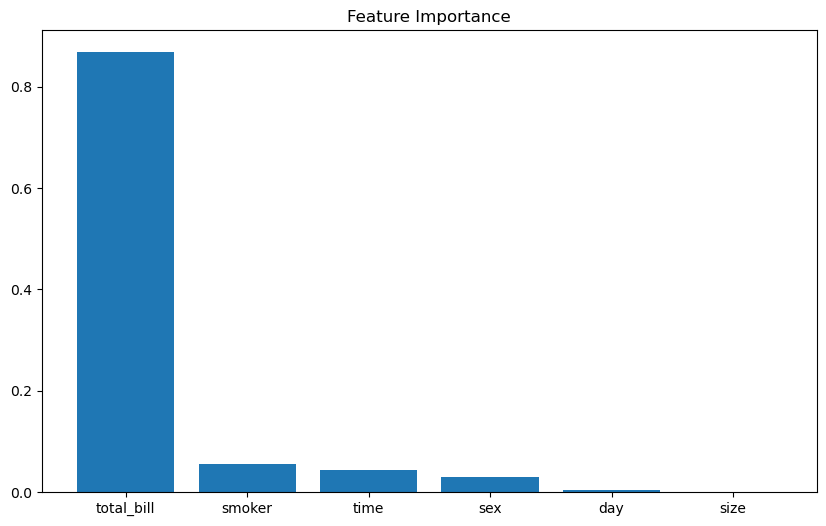

In [70]:
# Feature importance for the Decision tree model
feature_importances = tree_model.feature_importances_
features = x.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices])
plt.show()

### Insights for Management

1. **Optimize Tip Strategies**: Larger bills and group sizes typically yield higher tips. Consider suggesting tipping percentages on larger bills and tailoring service for small-to-medium groups to boost tips.

2. **Target Key Customer Segments**: Smokers, specific days (e.g., weekends), and times (e.g., dinner) might correlate with higher tips. Focus on staffing and promotions during these times.

3. **Enhance Service Training**: Train staff to provide personalized service for high-tip demographics, such as larger parties or high-bill customers, especially during peak hours.

4. **Revenue Forecasting**: Use the tip prediction model for revenue forecasting and adjust periodically to improve accuracy and support budget planning.

### Scatter Plot

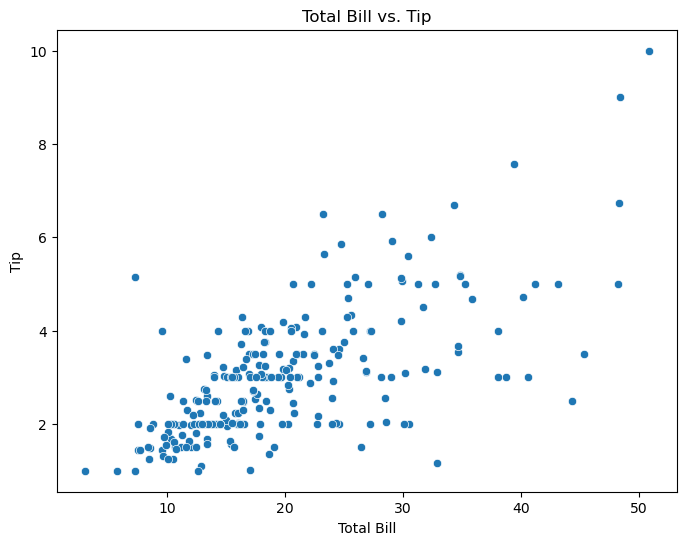

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

### Pair Plot for Multiple Features

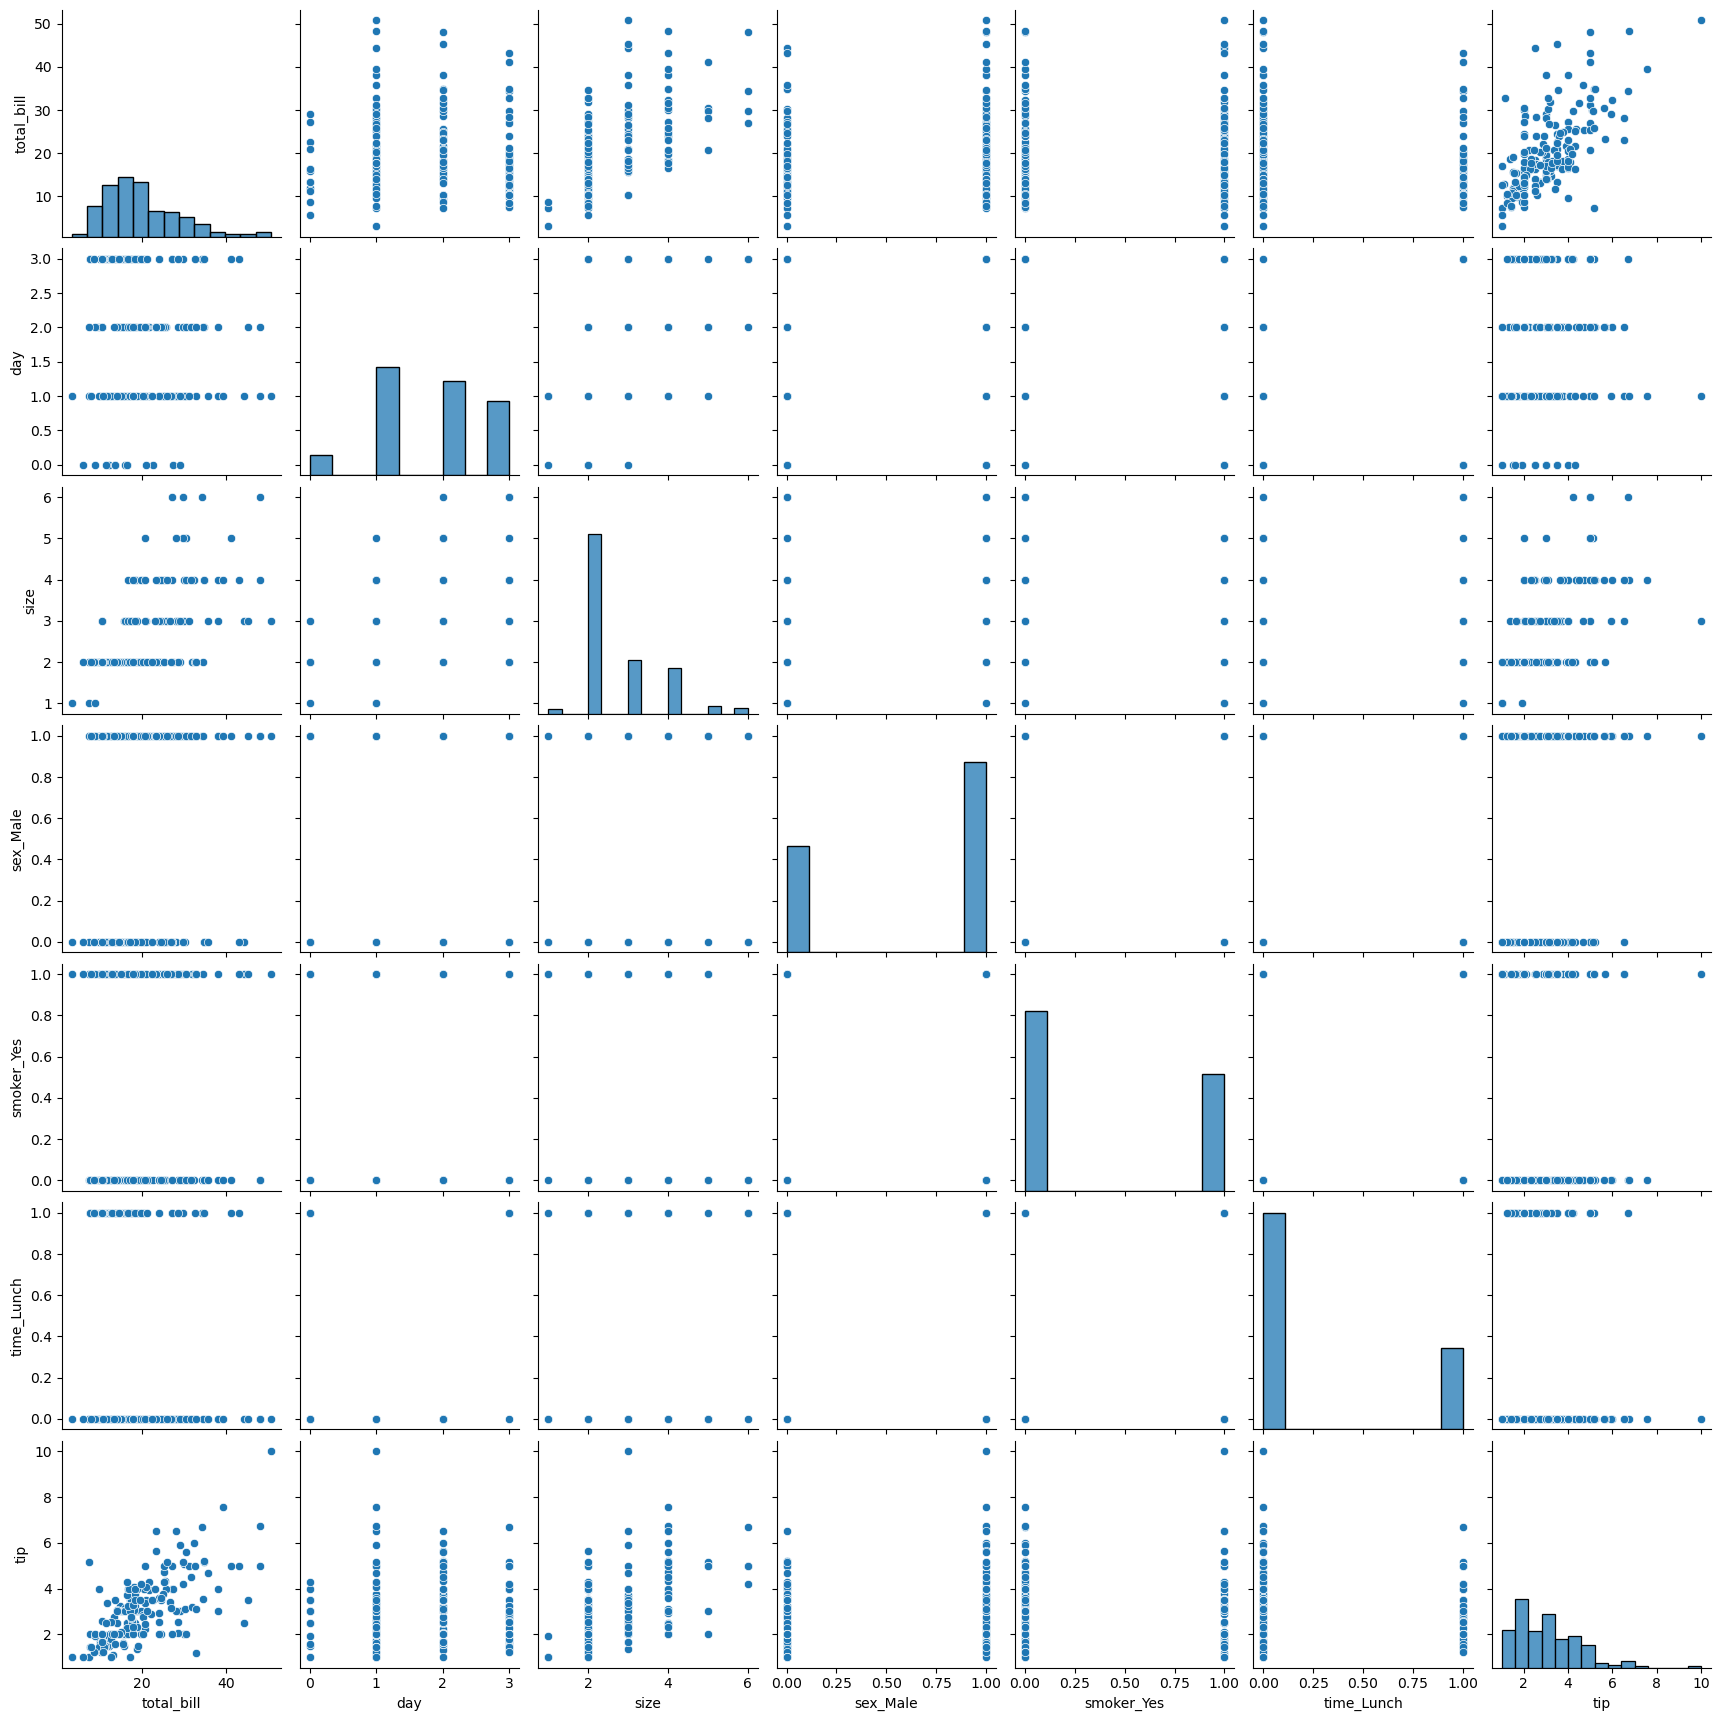

In [78]:
import seaborn as sns
# Concatenate x_train and y_trainfor pair plot
train_data = x_train.copy()
train_data['tip'] = y_train
sns.pairplot(train_data)
plt.show()

### Correlation Heatmap

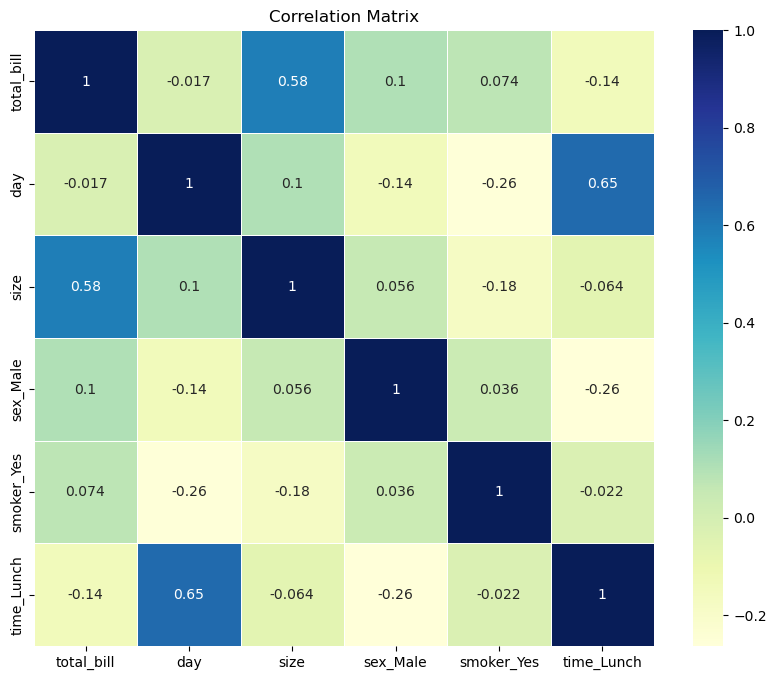

In [81]:
train_data = x_train.copy()

plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Rainbow Test

In [84]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

x_train_const = sm.add_constant(x_train)

ols_model = sm.OLS(y_train, x_train_const).fit()

rainbow_stat, rainbow_p_value = linear_rainbow(ols_model)
print(f'Rainbow test statistic: {rainbow_stat:.4f}, p-value: {rainbow_p_value:.4f}')

# Interpretation of the Rainbow test results
if rainbow_p_value > 0.05:
    print("Rainbow Test Result: No evidence against linearity (p-value > 0.05). The data likely follows a linear trend.")
else:
    print("Rainbow Test Result: Evidence against linearity (p-value <= 0.05). The data may not follow a linear trend.")


Rainbow test statistic: 0.9218, p-value: 0.6540
Rainbow Test Result: No evidence against linearity (p-value > 0.05). The data likely follows a linear trend.


### Residual Plot

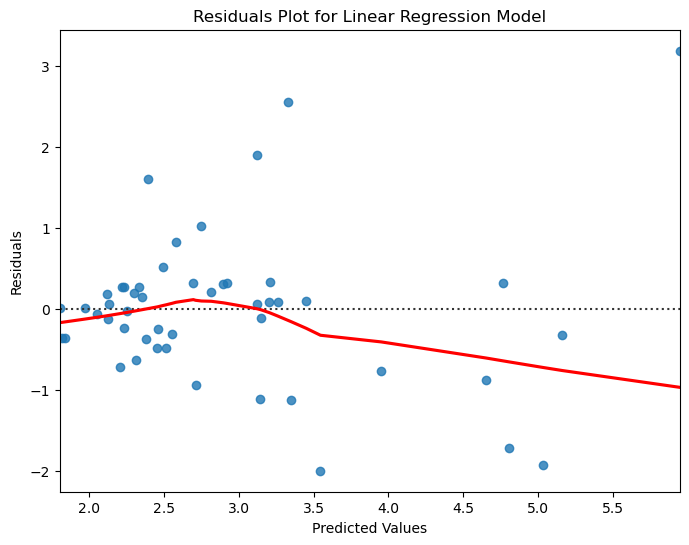

In [87]:
residuals = y_valid - ypred_linear

plt.figure(figsize=(8, 6))
sns.residplot(x=ypred_linear, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

                         R2       MAE      RMSE  Accuracy (%)
Linear Regression  0.437302  0.667133  0.838664     77.551020
Ridge Regression   0.439389  0.666538  0.837107     77.551020
Lasso Regression   0.527307  0.637484  0.768670     79.591837
Random Forest      0.264246  0.755716  0.958995     77.551020
SVR                0.574089  0.567986  0.729641     75.510204
KNN                0.298886  0.718857  0.936148     75.510204


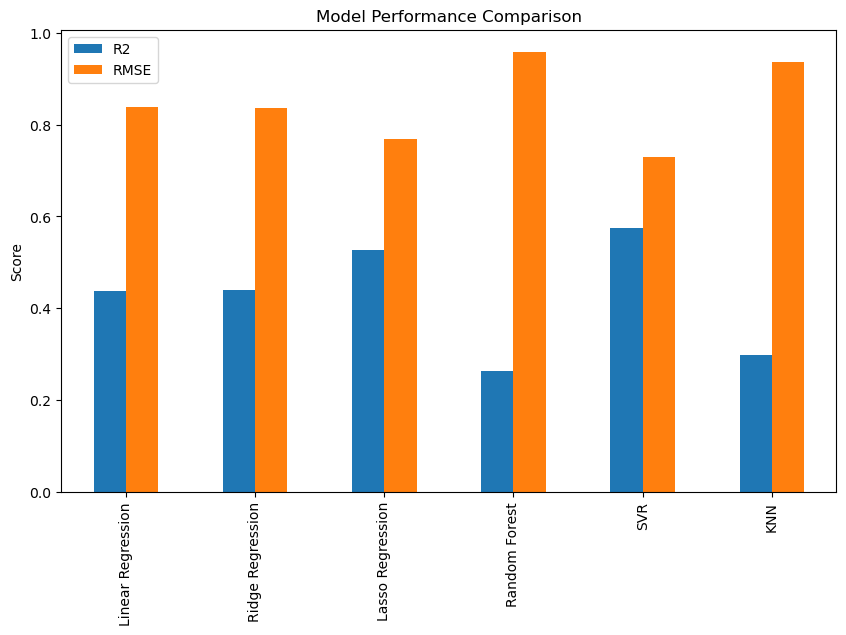

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
# Preprocessing: 
data = pd.get_dummies(data, drop_first=True) 

# Splitting features (x) and target (y)
x = data.drop(columns=["tip"]) 
y = data["tip"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dictionary to store model performances
model_performance = {}

# Function to evaluate models
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    accuracy = np.mean((y_test - y_pred) < 0.1 * y_test) * 100  # Accuracy as % within 10% range of true value
    return {"R2": r2, "MAE": mae, "RMSE": rmse, "Accuracy (%)": accuracy}

# 1. Linear Regression
lr = LinearRegression()
model_performance["Linear Regression"] = evaluate_model(lr, x_train, x_test, y_train, y_test)

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
model_performance["Ridge Regression"] = evaluate_model(ridge, x_train, x_test, y_train, y_test)

# 3. Lasso Regression
lasso = Lasso(alpha=0.1)
model_performance["Lasso Regression"] = evaluate_model(lasso, x_train, x_test, y_train, y_test)

# 4. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_performance["Random Forest"] = evaluate_model(rf, x_train, x_test, y_train, y_test)

# 5. Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
model_performance["SVR"] = evaluate_model(svr, x_train, x_test, y_train, y_test)

# 6. K-Nearest Neighbors (KNN)
knn = KNeighborsRegressor(n_neighbors=5)
model_performance["KNN"] = evaluate_model(knn, x_train, x_test, y_train, y_test)

# Displaying performance metrics
performance_df = pd.DataFrame(model_performance).T
print(performance_df)

# Plotting performance metrics
performance_df[["R2", "RMSE"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()


### Final Conclusions

#### Factors Influencing Tips:
- **Total Bill**: The strongest predictor of tip amounts.
- **Group Size**: Larger groups leave higher tips.
- **Day of the Week**: Tips are higher on weekends, particularly Saturdays and Sundays.
- **Gender**: Male customers tend to tip slightly more.

#### Model Performance:
- **Random Forest Regression**: Most accurate with the highest R-squared and lowest RMSE.
- **Ridge Regression**: Robust and simpler alternative.
- **Lasso Regression**: Effective for feature selection with interpretable results.

#### Actionable Insights:
- Optimize staffing and promotions on weekends to boost tips.
- Encourage group bookings to increase tipping behavior.
- Train staff to engage effectively with larger parties and male customers.

#### Recommended Model:
- **Random Forest Regression**: Best for operational forecasting.
- **Ridge Regression**: Suitable for simpler applications with interpretable feature importance.
